# CNA 

In [1]:
source(here::here("scripts/init.R"))

In [2]:
cna_df <- get_gene_cna_df() %>%
        filter(ER != "normal") %>%
        mutate(type = forcats::fct_explicit_na(type)) %>%
        gather("feat", "score", -(samp:ER)) %>% as_tibble()

In [3]:
cna_df_count <- cna_df %>%
        group_by(feat, ER) %>%
        mutate(score = cut(score, breaks = quantile(score, 0:5 / 5, na.rm = TRUE), include.lowest = TRUE, labels = as.character(1:5))) %>%
        filter(!is.na(cna)) %>%
        count(name, ER, feat, cna, score) %>%
        group_by(name, ER, feat, score) %>%
        mutate(p = n / sum(n)) %>%
        ungroup()

In [4]:
cna_pvals <- calc_features_cna_pvals(feats = c("clock", "MG", "ML")) %>%
        filter(ER != "all") %>%
        group_by(ER) %>%
        mutate(qval_loss = p.adjust(pval_loss), qval_gain = p.adjust(pval_gain)) %>%
        ungroup()

In [5]:
signif_cna_loss <- cna_pvals %>%
        filter(type %in% "TSG", qval_loss <= 0.01, p_loss >= 0.05) %>%        
        mutate(name1 = glue("{name} ({ER})")) %>% 
        ungroup()
signif_cna_loss

name,ER,type,feat,pval_loss,pval_gain,n_loss,n_gain,n_neut,n,p_loss,p_gain,p_neut,qval_loss,qval_gain,name1
<chr>,<chr>,<fct>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<glue>
APC,ER+,TSG,ML,1.063609e-06,0.645863718,100,95,803,998,0.10020040,0.09519038,0.8046092,3.041921e-04,1,APC (ER+)
ARID1A,ER+,TSG,MG,1.428949e-08,0.562847629,247,5,746,998,0.24749499,0.00501002,0.7474950,4.215400e-06,1,ARID1A (ER+)
ATM,ER+,TSG,MG,3.426603e-12,0.524590233,436,12,550,998,0.43687375,0.01202405,0.5511022,1.031407e-09,1,ATM (ER+)
BRCA1,ER+,TSG,MG,5.445255e-06,0.010605607,246,101,651,998,0.24649299,0.10120240,0.6523046,1.541007e-03,1,BRCA1 (ER+)
BRCA1,ER+,TSG,ML,4.613741e-07,0.856676692,246,101,651,998,0.24649299,0.10120240,0.6523046,1.328757e-04,1,BRCA1 (ER+)
BRCA2,ER+,TSG,MG,4.375058e-10,0.223707869,287,29,682,998,0.28757515,0.02905812,0.6833667,1.303767e-07,1,BRCA2 (ER+)
BUB1B,ER+,TSG,ML,1.700592e-05,0.080919040,156,28,814,998,0.15631263,0.02805611,0.8156313,4.727646e-03,1,BUB1B (ER+)
CTNNA1,ER+,TSG,ML,9.989345e-06,0.937043936,89,99,810,998,0.08917836,0.09919840,0.8116232,2.807006e-03,1,CTNNA1 (ER+)
FOXO3,ER+,TSG,clock,1.381421e-06,0.407367531,274,49,674,997,0.27482447,0.04914744,0.6760281,3.937050e-04,1,FOXO3 (ER+)


In [6]:
signif_cna_gain <- cna_pvals %>%
        filter(type %in% "ONC", qval_gain <= 0.01, p_gain >= 0.05) %>%
        mutate(name1 = glue("{name} ({ER})")) %>% 
        ungroup()
signif_cna_gain

name,ER,type,feat,pval_loss,pval_gain,n_loss,n_gain,n_neut,n,p_loss,p_gain,p_neut,qval_loss,qval_gain,name1
<chr>,<chr>,<fct>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<glue>
CCND1,ER+,ONC,MG,0.3150388889,4.476648e-11,40,293,665,998,0.04008016,0.2935872,0.6663327,1.0000000,1.369854e-08,CCND1 (ER+)
CCND1,ER+,ONC,ML,0.4951036089,2.999444e-05,40,293,665,998,0.04008016,0.2935872,0.6663327,1.0000000,8.818367e-03,CCND1 (ER+)
ESR1,ER+,ONC,ML,0.0006269846,1.792865e-05,236,74,688,998,0.23647295,0.0741483,0.6893788,0.1529842,5.288952e-03,ESR1 (ER+)
FGFR1,ER+,ONC,MG,0.5059516735,1.633273e-09,164,256,578,998,0.16432866,0.2565130,0.5791583,1.0000000,4.965150e-07,FGFR1 (ER+)
MYC,ER+,ONC,MG,0.3669024091,7.977468e-09,27,403,568,998,0.02705411,0.4038076,0.5691383,1.0000000,2.417173e-06,MYC (ER+)
MYC,ER+,ONC,ML,0.1339700251,2.848759e-08,27,403,568,998,0.02705411,0.4038076,0.5691383,1.0000000,8.603252e-06,MYC (ER+)
ZNF217,ER+,ONC,ML,0.8186992347,2.143220e-07,20,273,705,998,0.02004008,0.2735471,0.7064128,1.0000000,6.429661e-05,ZNF217 (ER+)
ZNF703,ER+,ONC,MG,0.8678301568,7.768429e-10,171,264,563,998,0.17134269,0.2645291,0.5641283,1.0000000,2.369371e-07,ZNF703 (ER+)


#### Extended Data Figure 10C

Joining, by = c("feat", "ER", "name")

Warning message:
“Removed 33 rows containing missing values (geom_text).”


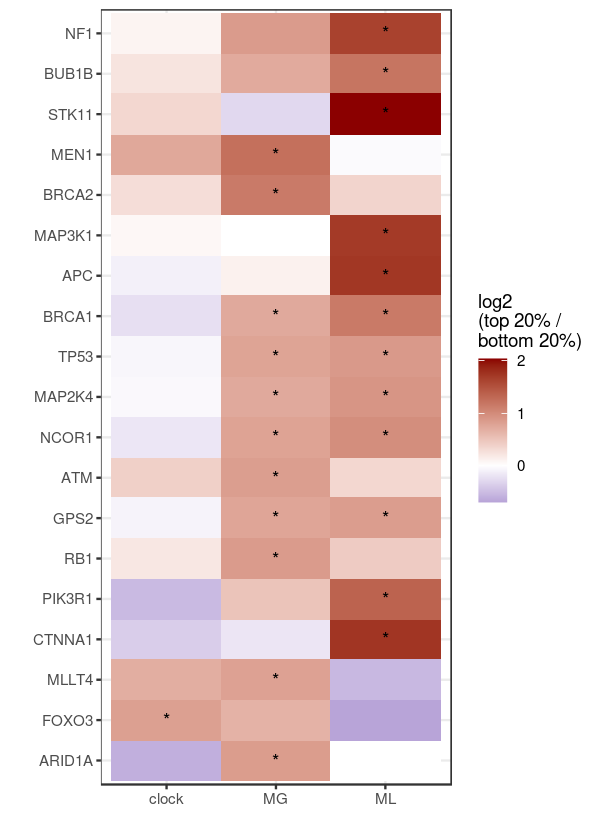

In [7]:
options(repr.plot.width = 5, repr.plot.height = 7)
df <- cna_df_count %>%
        mutate(name1 = glue("{name} ({ER})")) %>% 
        filter(name1 %in% signif_cna_loss$name1) %>%
        group_by(feat, ER, name) %>%
        mutate(n_tot = sum(n)) %>%
        select(-p) %>%
        spread(score, n) %>%
        filter(cna == "LOSSLOH") %>%
        mutate(r = log2(`5` / `1`)) %>%
        ungroup()

p_loss <- df %>%
        filter(feat %in% c("clock", "MG", "ML")) %>%
        left_join(signif_cna_loss %>% select(name, ER, feat, qval_loss)) %>%
        mutate(label = ifelse(qval_loss <= 0.01, "*", "")) %>%
#         filter(ER == 'ER+') %>%        
        select(name, ER, feat, r, label) %>%
        ggplot(aes(x = feat, y = reorder(name, r), fill = r)) + geom_tile() + scale_fill_gradient2(name = "log2\n(top 20% /\nbottom 20%)", low = "darkblue", mid = "white", high = "darkred", midpoint = 0, breaks=c(-2,-1,0,1,2)) + ylab("") + xlab("") + geom_text(aes(label = label)) + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) 

p_loss + theme_bw()

Joining, by = c("feat", "ER", "name")

Warning message:
“Removed 10 rows containing missing values (geom_text).”


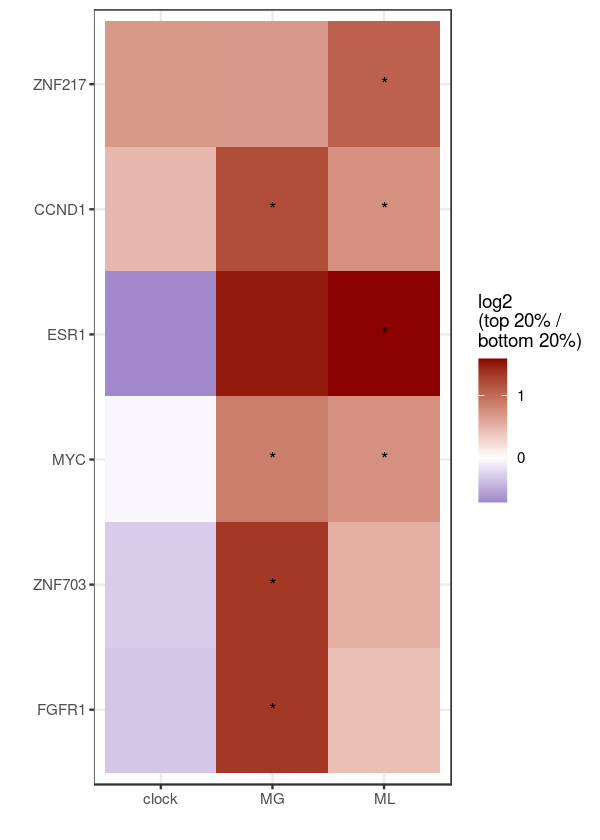

In [8]:
options(repr.plot.width = 5, repr.plot.height = 7)
df_gain <- cna_df_count %>%
        mutate(name1 = glue("{name} ({ER})")) %>% 
        filter(name1 %in% signif_cna_gain$name1) %>%
        group_by(feat, ER, name) %>%
        mutate(n_tot = sum(n)) %>%
        select(-p) %>%
        spread(score, n) %>%
        filter(cna == "GAINAMPL") %>%
        mutate(r = log2(`5` / `1`)) %>%
        ungroup()

p_gain <- df_gain %>%
        filter(feat %in% c("clock", "MG", "ML")) %>%
        left_join(signif_cna_gain %>% select(name, ER, feat, qval_gain)) %>%
        mutate(label = ifelse(qval_gain <= 0.01, "*", "")) %>%        
        select(name, ER, feat, r, label) %>%        
        ggplot(aes(x = feat, y = reorder(name, r), fill = r)) + geom_tile() + scale_fill_gradient2(name = "log2\n(top 20% /\nbottom 20%)", low = "darkblue", mid = "white", high = "darkred", midpoint = 0, breaks=c(-2,-1,0,1,2)) + ylab("") + xlab("") + geom_text(aes(label = label)) + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) 

p_gain + theme_bw()

In [ ]:
gc()